# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Carlos Henrique Brito Malta Leão/Vinícius Alves de Faria Resende 
### **Matrículas:** 2021039794/2021039972


### **Tema:** Avaliação Preditiva do Desempenho Acadêmico: Mineração de Classificadores para Identificação de Fatores de Evasão e Permanência Estudantil
### **Base de dados:** https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/


In [103]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 2. Data understanding (Entendimento dos dados)

### Resumo da Fase
A primeira fase do projeto é a "Data Understanding," que se concentra na coleta e compreensão inicial dos dados. Esta fase é essencial para estabelecer uma base sólida para análises posteriores e identificar possíveis desafios.


In [104]:
# Carregar o conjunto de dados
df = pd.read_csv('./dataset.csv')

In [105]:
# Visualizar as primeiras linhas do conjunto de dados
print("Primeiras linhas do conjunto de dados:")
print(df.head())

Primeiras linhas do conjunto de dados:
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10               

In [106]:
# Informações gerais sobre o conjunto de dados
print("\nInformações gerais sobre o conjunto de dados:")
print(df.info())


Informações gerais sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  

In [107]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
m

In [108]:
# Verificar valores ausentes
print("\nValores ausentes no conjunto de dados:")
print(df.isnull().sum())


Valores ausentes no conjunto de dados:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International           

### Introdução

Este conjunto de dados contém informações sobre estudantes, incluindo detalhes demográficos, histórico educacional, desempenho acadêmico e variáveis econômicas. O objetivo é analisar esses dados para entender padrões e correlações que possam influenciar o sucesso acadêmico dos alunos.

#### Informações Gerais
O conjunto de dados possui 4424 entradas e 35 colunas. Cada entrada representa um estudante, e as colunas abrangem uma variedade de características, desde o estado civil e modo de inscrição até o desempenho em diferentes semestres e variáveis econômicas.

A coluna alvo é denominada "Target" e indica se o aluno desistiu ("Dropout"), seguiu com a graduação ("Enrolled") ou se formou ("Graduate"). As demais colunas contêm informações como estado civil, modo de inscrição, idade na matrícula, qualificação dos pais, ocupação dos pais, desempenho acadêmico e indicadores econômicos.

Não há valores ausentes em nenhuma das colunas do conjunto de dados.


In [109]:
# Mapear os códigos para os significados correspondentes
marital_status_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

gender_mapping = {
    1: 'Male',
    0: 'Female'
}

qualification_mapping = {
    1: 'Secondary Education—12th Year of Schooling or Equivalent',
    2: 'Higher Education—bachelor’s degree',
    3: 'Higher Education—degree',
    4: 'Higher Education—master’s degree',
    5: 'Higher Education—doctorate',
    6: 'Frequency of Higher Education',
    7: '12th Year of Schooling—not completed',
    8: '11th Year of Schooling—not completed',
    9: '7th Year (Old)',
    10: 'Other—11th Year of Schooling',
    11: '2nd year complementary high school course',
    12: '10th Year of Schooling',
    13: 'General commerce course',
    14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    15: 'Complementary High School Course',
    16: 'Technical-professional course',
    17: 'Complementary High School Course—not concluded',
    18: '7th year of schooling',
    19: '2nd cycle of the general high school course',
    20: '9th Year of Schooling—not completed',
    21: '8th year of schooling',
    22: 'General Course of Administration and Commerce',
    23: 'Supplementary Accounting and Administration',
    24: 'Unknown',
    25: 'Cannot read or write',
    26: 'Can read without having a 4th year of schooling',
    27: 'Basic education 1st cycle (4th/5th year) or equivalent',
    28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
    29: 'Technological specialization course',
    30: 'Higher education—degree (1st cycle)',
    31: 'Specialized higher studies course',
    32: 'Professional higher technical course',
    33: 'Higher Education—master’s degree (2nd cycle)',
    34: 'Higher Education—doctorate (3rd cycle)'
}


occupation_mapping = {
    1: 'Student',
    2: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    3: 'Specialists in Intellectual and Scientific Activities',
    4: 'Intermediate Level Technicians and Professions',
    5: 'Administrative staff',
    6: 'Personal Services, Security and Safety Workers, and Sellers',
    7: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    8: 'Skilled Workers in Industry, Construction, and Craftsmen',
    9: 'Installation and Machine Operators and Assembly Workers',
    10: 'Unskilled Workers',
    11: 'Armed Forces Professions',
    12: 'Other Situation; 13—(blank)',
    14: 'Armed Forces Officers',
    15: 'Armed Forces Sergeants',
    16: 'Other Armed Forces personnel',
    17: 'Directors of administrative and commercial services',
    18: 'Hotel, catering, trade, and other services directors',
    19: 'Specialists in the physical sciences, mathematics, engineering, and related techniques',
    20: 'Health professionals',
    21: 'Teachers',
    22: 'Specialists in finance, accounting, administrative organization, and public and commercial relations',
    23: 'Intermediate level science and engineering technicians and professions',
    24: 'Technicians and professionals of intermediate level of health',
    25: 'Intermediate level technicians from legal, social, sports, cultural, and similar services',
    26: 'Information and communication technology technicians',
    27: 'Office workers, secretaries in general, and data processing operators',
    28: 'Data, accounting, statistical, financial services, and registry-related operators',
    29: 'Other administrative support staff',
    30: 'Personal service workers',
    31: 'Sellers',
    32: 'Personal care workers and the like',
    33: 'Protection and security services personnel',
    34: 'Market-oriented farmers and skilled agricultural and animal production workers',
    35: 'Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence',
    36: 'Skilled construction workers and the like, except electricians',
    37: 'Skilled workers in metallurgy, metalworking, and similar',
    38: 'Skilled workers in electricity and electronics',
    39: 'Workers in food processing, woodworking, and clothing and other industries and crafts',
    40: 'Fixed plant and machine operators',
    41: 'Assembly workers',
    42: 'Vehicle drivers and mobile equipment operators',
    43: 'Unskilled workers in agriculture, animal production, and fisheries and forestry',
    44: 'Unskilled workers in extractive industry, construction, manufacturing, and transport',
    45: 'Meal preparation assistants',
    46: 'Street vendors (except food) and street service providers'
}


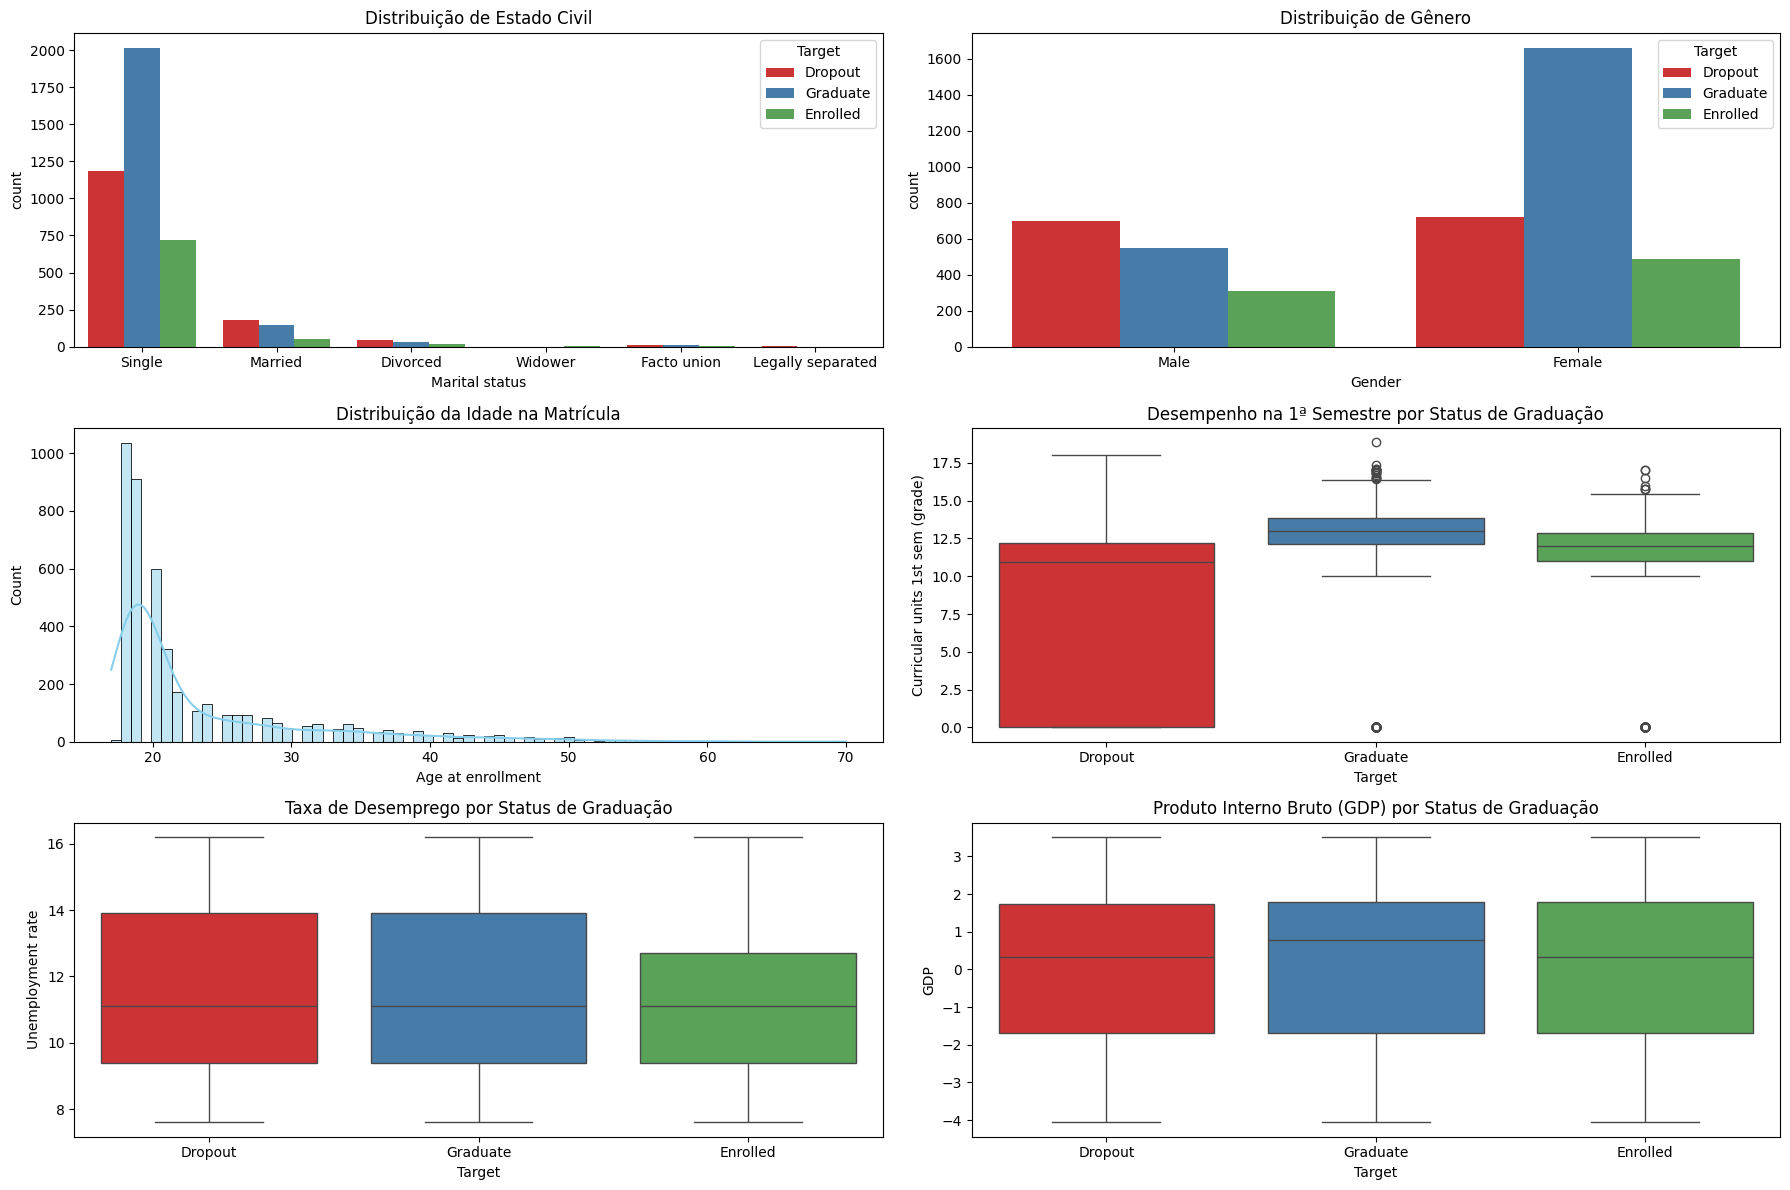

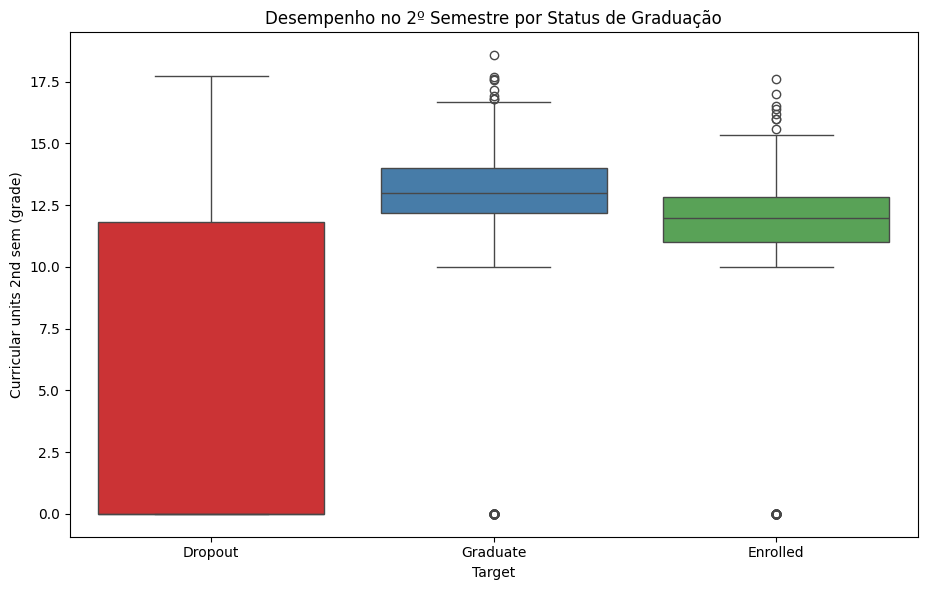

In [110]:
# Visualizar a distribuição de variáveis categóricas
plt.figure(figsize=(18, 12))

# Gráfico de Estado Civil
plt.subplot(3, 2, 1)
sns.countplot(x='Marital status', data=df.replace({'Marital status': marital_status_mapping}), hue='Target', palette='Set1')
plt.title('Distribuição de Estado Civil')

# Gráfico de Gênero
plt.subplot(3, 2, 2)
sns.countplot(x='Gender', data=df.replace({'Gender': gender_mapping}), hue='Target', palette='Set1')
plt.title('Distribuição de Gênero')

# Gráfico de Idade na Matrícula
plt.subplot(3, 2, 3)
sns.histplot(df['Age at enrollment'], kde=True, color='skyblue')
plt.title('Distribuição da Idade na Matrícula')

# Gráfico de Desempenho na 1ª Semestre por Status de Graduação
plt.subplot(3, 2, 4)
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=df, palette='Set1', hue='Target')
plt.title('Desempenho na 1ª Semestre por Status de Graduação')

# Gráfico de Taxa de Desemprego por Status de Graduação
plt.subplot(3, 2, 5)
sns.boxplot(x='Target', y='Unemployment rate', data=df, palette='Set1', hue='Target')
plt.title('Taxa de Desemprego por Status de Graduação')

# Gráfico de Produto Interno Bruto (GDP) por Status de Graduação
plt.subplot(3, 2, 6)
sns.boxplot(x='Target', y='GDP', data=df, palette='Set1', hue='Target')
plt.title('Produto Interno Bruto (GDP) por Status de Graduação')

plt.tight_layout()
plt.show()

# Gráfico de Desempenho no 2º Semestre por Status de Graduação
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Target', y='Curricular units 2nd sem (grade)', data=df, palette='Set1', hue='Target')
plt.title('Desempenho no 2º Semestre por Status de Graduação')

plt.tight_layout()
plt.show()


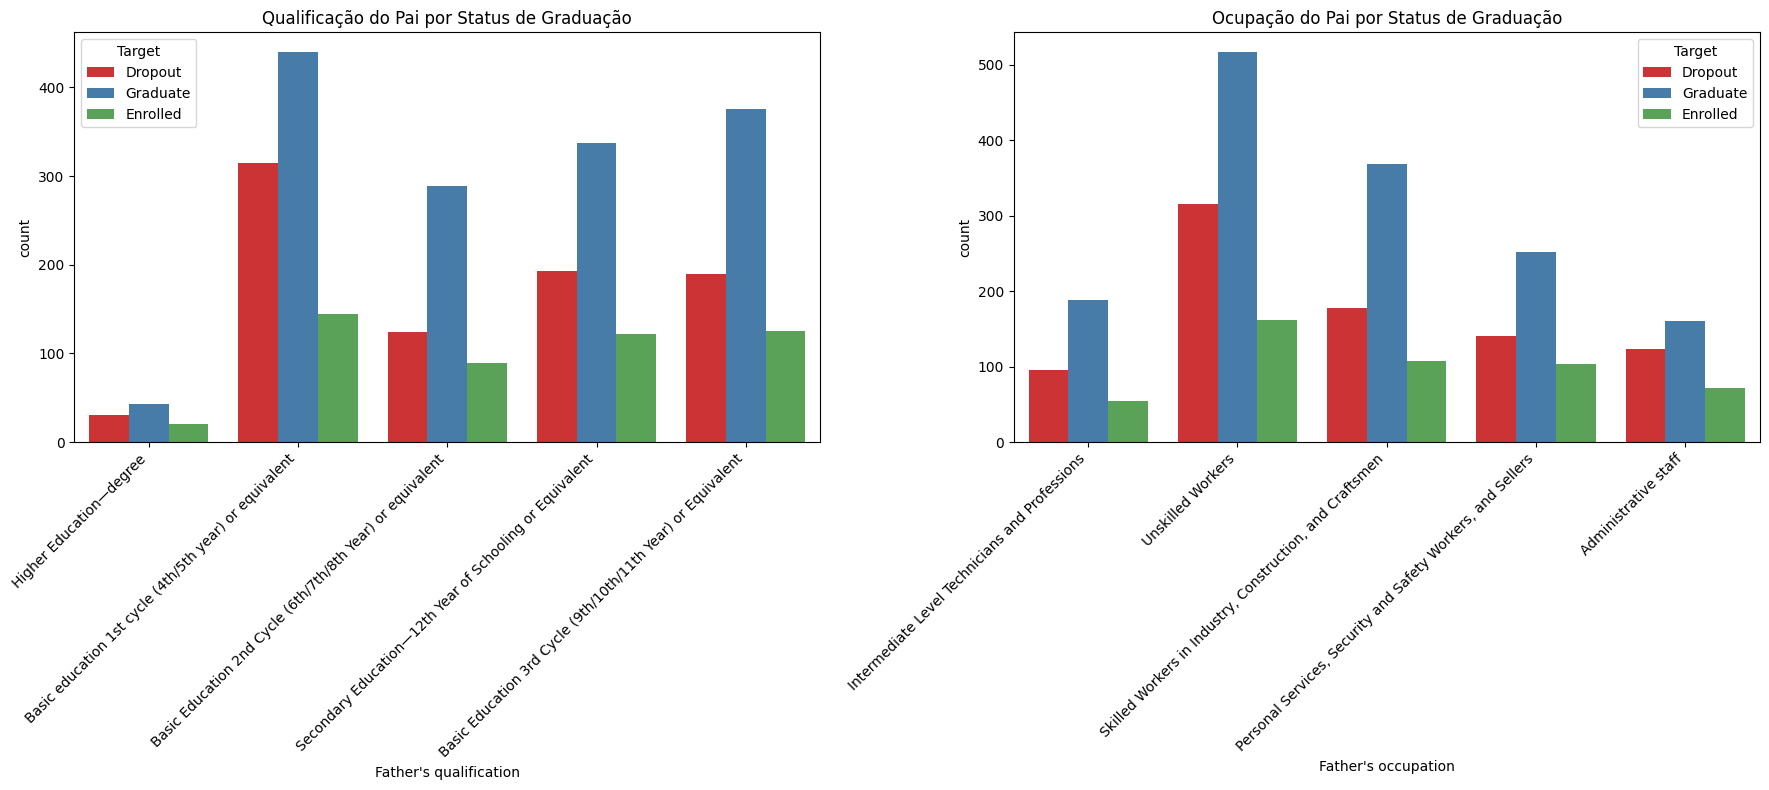

In [111]:
# Escolher apenas as 5 classificações mais frequentes para as variáveis de ocupação e qualificação
top_father_occupations = df["Father's occupation"].value_counts().nlargest(5).index
top_father_qualifications = df["Father's qualification"].value_counts().nlargest(5).index

# Filtrar o DataFrame apenas para incluir as classificações mais frequentes
df_father_filtered = df[df["Father's occupation"].isin(top_father_occupations) & df["Father's qualification"].isin(top_father_qualifications)].copy()

# Mapear os códigos para rótulos nas variáveis categóricas
df_father_filtered.loc[:, "Father's occupation"] = df_father_filtered["Father's occupation"].map(occupation_mapping)
df_father_filtered.loc[:, "Father's qualification"] = df_father_filtered["Father's qualification"].map(qualification_mapping)

# Configurar a aparência dos gráficos
plt.figure(figsize=(18, 8))

hue_order = ['Dropout', 'Graduate', 'Enrolled']

# Gráfico de Qualificação do Pai por Target
plt.subplot(1, 2, 1)
sns.countplot(x="Father's qualification", data=df_father_filtered, hue='Target', hue_order=hue_order, palette='Set1')
plt.title("Qualificação do Pai por Status de Graduação")
plt.xticks(rotation=45, ha='right')

# Gráfico de Ocupação do Pai por Target
plt.subplot(1, 2, 2)
sns.countplot(x="Father's occupation", data=df_father_filtered, hue='Target', hue_order=hue_order, palette='Set1')
plt.title("Ocupação do Pai por Status de Graduação")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

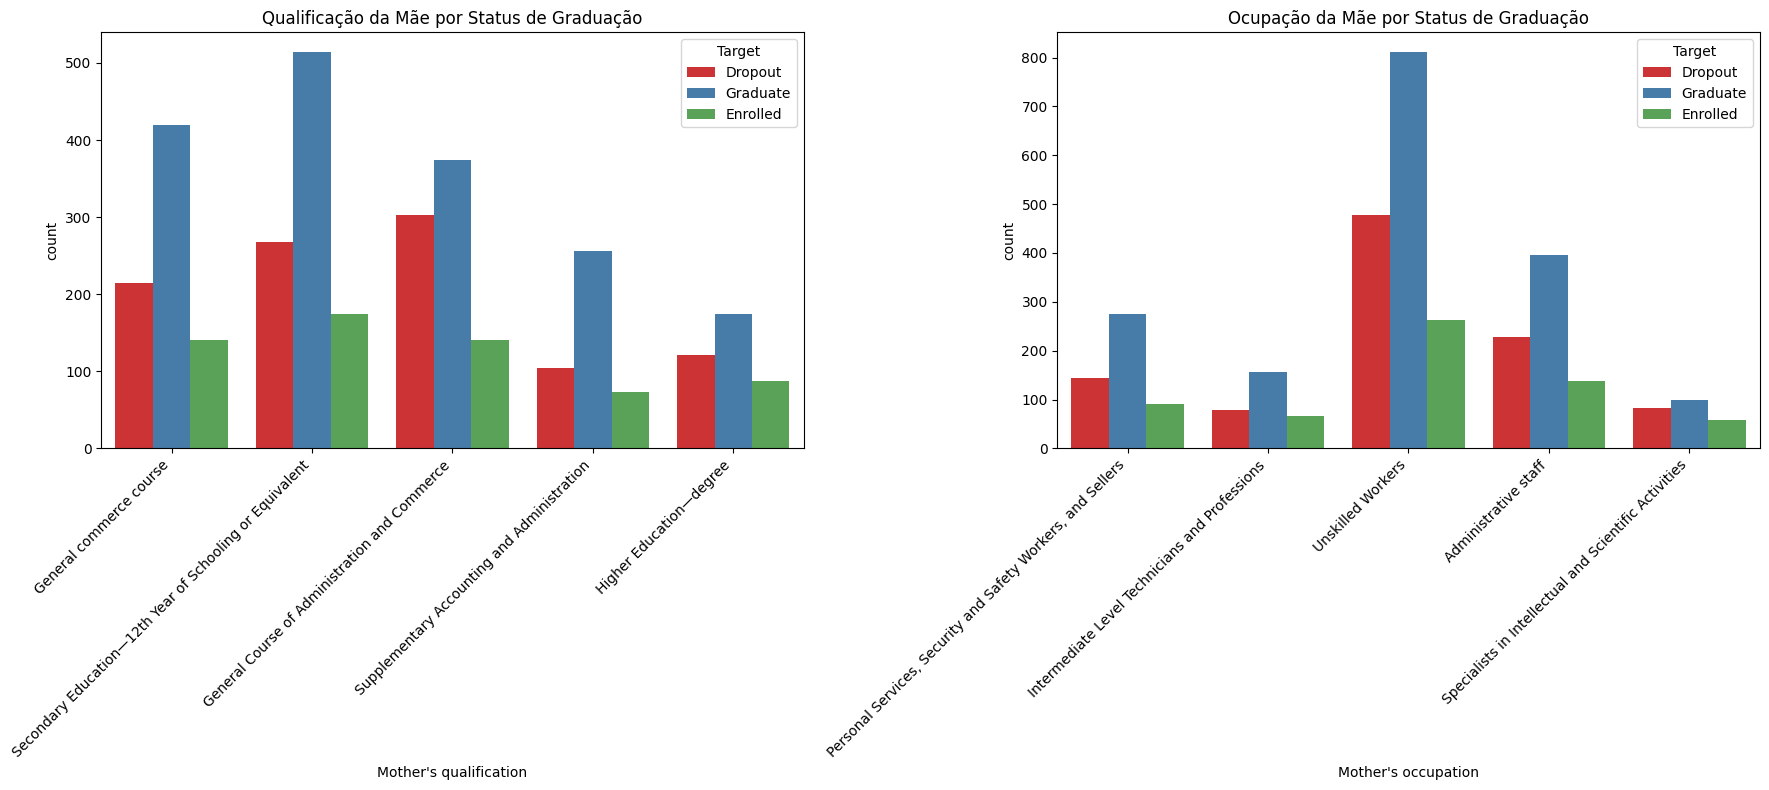

In [112]:
# Escolher apenas as 5 classificações mais frequentes para as variáveis de ocupação e qualificação
top_mother_occupations = df["Mother's occupation"].value_counts().nlargest(5).index
top_mother_qualifications = df["Mother's qualification"].value_counts().nlargest(5).index

# Filtrar o DataFrame apenas para incluir as classificações mais frequentes
df_mother_filtered = df[df["Mother's occupation"].isin(top_mother_occupations) & df["Mother's qualification"].isin(top_mother_qualifications)].copy()

# Mapear os códigos para rótulos nas variáveis categóricas
df_mother_filtered.loc[:, "Mother's occupation"] = df_mother_filtered["Mother's occupation"].map(occupation_mapping)
df_mother_filtered.loc[:, "Mother's qualification"] = df_mother_filtered["Mother's qualification"].map(qualification_mapping)

# Configurar a aparência dos gráficos
plt.figure(figsize=(18, 8))

# Gráfico de Qualificação da Mãe por Target
plt.subplot(1, 2, 1)
sns.countplot(x="Mother's qualification", data=df_mother_filtered, hue='Target', hue_order=hue_order, palette='Set1')
plt.title("Qualificação da Mãe por Status de Graduação")
plt.xticks(rotation=45, ha='right')

# Gráfico de Ocupação da Mãe por Target
plt.subplot(1, 2, 2)
sns.countplot(x="Mother's occupation", data=df_mother_filtered, hue='Target', palette='Set1')
plt.title("Ocupação da Mãe por Status de Graduação")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [113]:
# Função para imprimir estatísticas descritivas e contagens para variáveis categóricas
def print_categorical_stats(feature, df):
    print(f"\nEstatísticas para {feature}:")
    if feature in df.columns:
        if feature == 'Ocupation' or feature == "Mother's occupation" or feature == "Father's occupation":
            mapping = occupation_mapping
        elif feature == "Mother's qualification" or feature == "Father's qualification":
            mapping = qualification_mapping
        elif feature == 'Gender':
            mapping = gender_mapping
        elif feature == 'Marital status':
            mapping = marital_status_mapping
        else:
            mapping = None

        if mapping:
            # Substituir códigos pelos rótulos correspondentes
            df_display = df.replace({feature: mapping})

            # Contagem de categorias
            print(df_display[feature].value_counts())

            # Estatísticas descritivas
            print("\nEstatísticas Descritivas:")
            print(df_display.groupby('Target')[feature].describe())
        else:
            print(f"Mapeador não encontrado para a variável {feature}.")
    else:
        print(f"A coluna {feature} não está presente no DataFrame.")

In [114]:
# Lista de variáveis categóricas
categorical_variables = ['Marital status', 'Gender', 'Qualification', 'Ocupation',
                          "Mother's qualification", "Father's qualification",
                          "Mother's occupation", "Father's occupation"]

# Imprimir estatísticas para variáveis categóricas
for feature in categorical_variables:
    print_categorical_stats(feature, df)


Estatísticas para Marital status:
Marital status
Single               3919
Married               379
Divorced               91
Facto union            25
Legally separated       6
Widower                 4
Name: count, dtype: int64

Estatísticas Descritivas:
         count unique     top  freq
Target                             
Dropout   1421      6  Single  1184
Enrolled   794      6  Single   720
Graduate  2209      6  Single  2015

Estatísticas para Gender:
Gender
Female    2868
Male      1556
Name: count, dtype: int64

Estatísticas Descritivas:
         count unique     top  freq
Target                             
Dropout   1421      2  Female   720
Enrolled   794      2  Female   487
Graduate  2209      2  Female  1661

Estatísticas para Qualification:
A coluna Qualification não está presente no DataFrame.

Estatísticas para Ocupation:
A coluna Ocupation não está presente no DataFrame.

Estatísticas para Mother's qualification:
Mother's qualification
Secondary Education—12th Yea

In [115]:
# Lista de variáveis numéricas
numeric_variables = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Unemployment rate', 'GDP',
                     'Curricular units 2nd sem (grade)']

# Imprimir estatísticas para variáveis numéricas
for feature in numeric_variables:
    print(f"\nEstatísticas para {feature}:")
    print(df.groupby('Target')[feature].describe())
    print("\n")



Estatísticas para Age at enrollment:
           count       mean       std   min   25%   50%   75%   max
Target                                                             
Dropout   1421.0  26.068966  8.704024  18.0  19.0  23.0  30.0  70.0
Enrolled   794.0  22.369018  6.302672  17.0  19.0  20.0  23.0  54.0
Graduate  2209.0  21.783612  6.693218  17.0  18.0  19.0  21.0  62.0



Estatísticas para Curricular units 1st sem (grade):
           count       mean       std  min        25%        50%        75%  \
Target                                                                        
Dropout   1421.0   7.256656  6.031120  0.0   0.000000  10.928571  12.200000   
Enrolled   794.0  11.125257  3.675084  0.0  11.000000  12.000000  12.857143   
Graduate  2209.0  12.643655  2.699027  0.0  12.121429  13.000000  13.857143   

             max  
Target            
Dropout   18.000  
Enrolled  17.000  
Graduate  18.875  



Estatísticas para Unemployment rate:
           count       mean       st

### Análise de Resultados

#### Estatísticas para Marital Status:

A coluna Marital Status possui seis categorias distintas, representadas por 'Single', 'Married', 'Divorced', 'Facto union', 'Legally separated' e 'Widower'. A contagem de cada categoria é a seguinte:

- Single: 3919
- Married: 379
- Divorced: 91
- Facto union: 25
- Legally separated: 6
- Widower: 4

Ao analisar as estatísticas descritivas, observa-se que a categoria mais frequente para cada grupo-alvo ('Dropout', 'Enrolled' e 'Graduate') é 'Single'. Por exemplo, para os graduados ('Graduate'), 2015 dos 2209 indivíduos são solteiros.

Pela visualização gráfica apresentada podemos ver uma diferença entre as proporções das categorias de permanência/evasão escolar para cada grupo. No grupo de solteiros vemos que a grande maioria se graduou, porém vemos que para os Casados e Divorciados a maioria é carecterizada pelos alunos que desistiram do curso.

#### Estatísticas para Gênero (Gender):

A coluna Gender possui duas categorias: 'Female' e 'Male'. A contagem de cada categoria é a seguinte:

- Female: 2868
- Male: 1556

Ao observar o gráfico, podemos ver que a distruibuição de cada classificação varia bastante entre o público feminino e masculino. Dentre os alunos do sexo masculino, a taxa de desistência é proporcionalmente maior do que se comparado com as alunas do sexo feminino.

Mesmo com a visualização gráfica simples é possível notar uma forte correlação entre a evasão/perminância para os diferentes gêneros considerados.

#### Distribuição para Idade de Matrícula:

A fim de conhecer mais sobre as características únicas dos alunos, plotamos um gráfico mostrando a distribuição de idades dos alunos. Pudemos ver que, considerando um espaço universitário para cursos de graduação, a maioria dos alunos se encontra na casa dos 18 aos 25 anos.

Mesmo assim podemos observar alunos com idades além dos 45 anos. Considerando a distruibuição de frequência, estes podem até ser classificados como outliers, especialmente considerando uma visualização bloxplot.

#### Desempenho no 1° e 2° semestres:

Considerando o desempenho dos alunos no primeiro e segundo semestres do curso, é notável que a distribuição de notas dos alunos desistentes se estende bem mais para valores de baixo desempenho.

Os alunos graduados também demonstram um padrão de nota acima dos outros.

#### Estatísticas para Qualificação do Pai (Father's Qualification):

A coluna Qualificação do Pai também apresenta várias categorias representando diferentes níveis de educação e formação. As cinco categorias mais frequentes são:

1. Basic Education 1st Cycle (4th/5th Year) or Equivalent: 1209
2. Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent: 968
3. Secondary Education—12th Year of Schooling or Equivalent: 904
4. Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent: 702
5. Higher Education—degree: 282

Não existe nenhuma relação forte que salte aos olhos ao observar os gráficos. Mas mesmo assim, conseguimos notar que para alguns casos, a proporção de alunos desistentes é maior do que de alunos que persistiram. Por exemplo, a proporção de desistentes considerando pais que só tiveram acesso parcial ao ciclo básico de educação é maior que as do que tiveram acesso a todo ciclo básico.

#### Estatísticas para Ocupação do Pai (Father's Occupation):

A coluna Ocupação do Pai também possui diversas categorias representando diferentes ocupações. As cinco categorias mais frequentes são:

1. Unskilled Workers: 1010
2. Skilled Workers in Industry, Construction, and Craftsmen: 666
3. Personal Services, Security and Safety Workers, and Sellers: 516
4. Administrative Staff: 386
5. Intermediate Level Technicians and Professions: 384

Em relação a ocupação vemos um padrão semelhante, notamos que dentre os filhos de pais com categoria "Unskilled Workers", a proporção de desistência é maior do que se considerarmos os "Skilled Workers". De toda forma, algo que pode chamar a atenção é o fato de que a proporção de desistencia para os alunos com pais classificados como "Administrative Staff" é proporcionalmente alta se comparada as outras ocupações.

#### Estatísticas para Qualificação da Mãe (Mother's Qualification):

A coluna Qualificação da Mãe apresenta uma variedade de categorias representando diferentes níveis de educação e formação. As cinco categorias mais frequentes são:

1. Secondary Education—12th Year of Schooling or Equivalent: 1069
2. General Course of Administration and Commerce: 1009
3. General Commerce Course: 953
4. Supplementary Accounting and Administration: 562
5. Higher Education—degree: 438

Nesse caso também não há forte correlação, mas é notável que a proporção de desistências para os filhos de mães que cursaram cursos gerais de administração e comércio é bem maior que para as outras qualificações.

#### Estatísticas para Ocupação da Mãe (Mother's Occupation):

A coluna Ocupação da Mãe possui diversas categorias representando diferentes ocupações. As cinco categorias mais frequentes são:

1. Unskilled Workers: 1577
2. Administrative Staff: 817
3. Personal Services, Security and Safety Workers, and Sellers: 530
4. Intermediate Level Technicians and Professions: 351
5. Specialists in Intellectual and Scientific Activities: 318

Nesse caso temos um comportamento bem similar ao caso da ocupações dos pais.

## 3. Data preparation (Preparação dos dados)

In [116]:
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


### Classificação Binária

Dado o objetivo do trabalho, de explorar a relação das variáveis da base de dados com a evasão ou permanência escolar dos alunos, a diferenciação entre "Enrolled" e "Graduate" não é necessária. Dessa forma optaremos por tratar ambas como uma coisa conjunta, representando a permanência escolar.

Esta é a primeira ação que deverá ser tomada no que tange a preparação dos dados, esta mudança se faz necessária até mesmo antes de prosseguir com a etapa de preparação, pois os resultados de normalização e separação de base de treinamento e teste dependem desta ação.

Dessa forma, ao invés de lidarmos com um classificador multi-classe, estaremos lidando com um classificador binário.

In [132]:
# Colunas menos relevantes para remoção
colunas_menos_relevantes = [
    'Application mode',
    'Application order',
    'Nacionality',
]

# Removendo colunas menos relevantes do DataFrame
df_final = df.drop(columns=colunas_menos_relevantes)

# Exibindo as primeiras linhas do novo DataFrame após a remoção
print(df_final.head())
print(df_final.columns.size)


   Marital status  Course  Daytime/evening attendance  Previous qualification  \
0               1       2                           1                       1   
1               1      11                           1                       1   
2               1       5                           1                       1   
3               1      15                           1                       1   
4               2       3                           0                       1   

   Mother's qualification  Father's qualification  Mother's occupation  \
0                      13                      10                    6   
1                       1                       3                    4   
2                      22                      27                   10   
3                      23                      27                    6   
4                      22                      28                   10   

   Father's occupation  Displaced  Educational special needs  ...  \

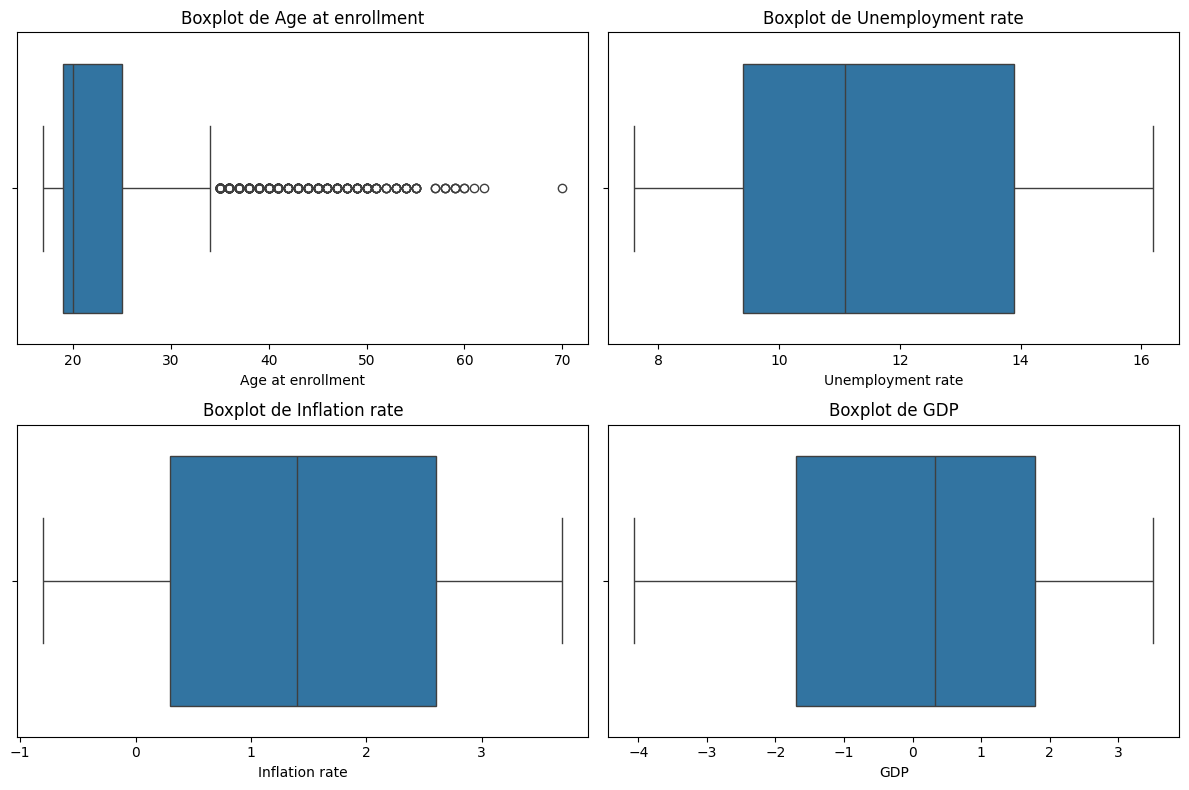

In [118]:

# Lista de variáveis numéricas para visualizar outliers
variaveis_numericas = ['Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']

# Configuração do tamanho do gráfico
plt.figure(figsize=(12, 8))

# Loop para criar boxplots para cada variável numérica
for i, variavel in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_final[variavel])
    plt.title(f'Boxplot de {variavel}')

# Ajustes de layout
plt.tight_layout()
plt.show()


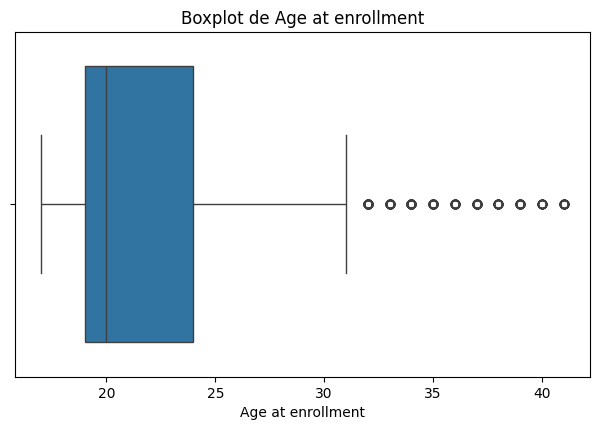

In [119]:
# Definindo um limite para identificar outliers
limite_superior = df_final['Age at enrollment'].quantile(0.95)

# Removendo valores acima do limite superior
df_final = df_final[df_final['Age at enrollment'] <= limite_superior]
variaveis_numericas = ['Age at enrollment']

# Configuração do tamanho do gráfico
plt.figure(figsize=(12, 8))

# Loop para criar boxplots para cada variável numérica
for i, variavel in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_final[variavel])
    plt.title(f'Boxplot de {variavel}')

# Ajustes de layout
plt.tight_layout()
plt.show()


In [120]:
df_final['Target'].value_counts()

Target
1    2912
0    1318
Name: count, dtype: int64

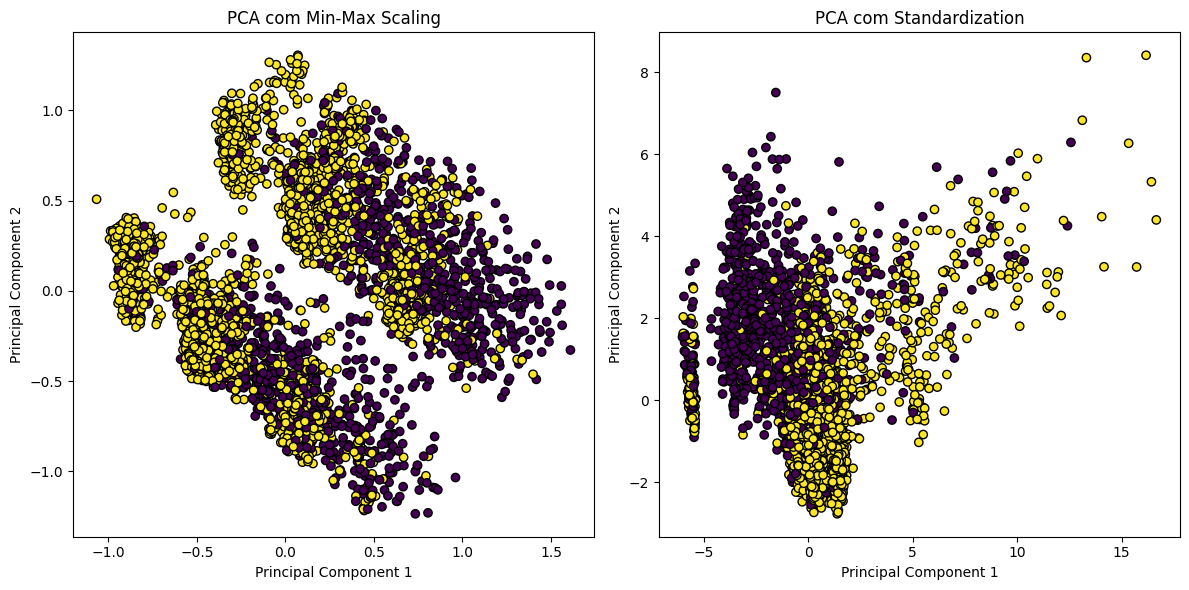

In [121]:


# Inicializando os scalers
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Aplicando PCA nas variáveis normalizadas com Min-Max Scaling
X_minmax_pca = PCA(n_components=2).fit_transform(scaler_minmax.fit_transform(df_final.drop('Target', axis=1)))

# Plotando gráfico para Min-Max Scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_minmax_pca[:, 0], X_minmax_pca[:, 1], c=df_final['Target'], cmap='viridis', edgecolors='k')
plt.title('PCA com Min-Max Scaling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Aplicando PCA nas variáveis normalizadas com Standardization
X_standard_pca = PCA(n_components=2).fit_transform(scaler_standard.fit_transform(df_final.drop('Target', axis=1)))

# Plotando gráfico para Standardization
plt.subplot(1, 2, 2)
plt.scatter(X_standard_pca[:, 0], X_standard_pca[:, 1], c=df_final['Target'], cmap='viridis', edgecolors='k')
plt.title('PCA com Standardization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Ajustes de layout
plt.tight_layout()
plt.show()



In [122]:
# Inicializando o scaler
scaler_standard = StandardScaler()

# Aplicando standardization ao DataFrame (excluindo a coluna 'Target')
df_final_scaled = df_final.copy()
df_final_scaled[df_final.columns[:-1]] = scaler_standard.fit_transform(df_final[df_final.columns[:-1]])

# Visualizando as primeiras linhas do DataFrame normalizado
print(df_final_scaled.head())

   Marital status    Course  Daytime/evening attendance  \
0       -0.251718 -1.856592                    0.322277   
1       -0.251718  0.249312                    0.322277   
2       -0.251718 -1.154624                    0.322277   
3       -0.251718  1.185269                    0.322277   
6       -0.251718  0.483301                    0.322277   

   Previous qualification  Mother's qualification  Father's qualification  \
0               -0.369068                0.113206               -0.556552   
1               -0.369068               -1.219427               -1.188532   
2               -0.369068                1.112680                0.978256   
3               -0.369068                1.223733                0.978256   
6               -0.369068                0.113206                1.068539   

   Mother's occupation  Father's occupation  Displaced  \
0            -0.316036             0.446190   0.874475   
1            -0.814760            -0.780047   0.874475   
2       

In [123]:
# Separando as features (X) e o target (y)
X = df_final_scaled.drop('Target', axis=1)
y = df_final_scaled['Target']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizando as dimensões dos conjuntos
print("Dimensões dos conjuntos:")
print("Conjunto de Treinamento (X):", X_train.shape)
print("Conjunto de Teste (X):", X_test.shape)
print("Conjunto de Treinamento (y):", y_train.shape)
print("Conjunto de Teste (y):", y_test.shape)


Dimensões dos conjuntos:
Conjunto de Treinamento (X): (3384, 31)
Conjunto de Teste (X): (846, 31)
Conjunto de Treinamento (y): (3384,)
Conjunto de Teste (y): (846,)


### Remoção de colunas menos relevantes

Durante a análise das características do conjunto de dados, identificamos colunas que poderiam ter uma menor relevância para o classificador binário de evasão escolar. Optamos por remover as seguintes colunas:

- 'Application mode'
- 'Application order'
- 'Nacionality'

Essa escolha foi baseada na análise de relevância de cada variável para o objetivo específico de prever a evasão escolar.

### Exploração e Tratamento de Outliers

Durante a análise exploratória, identificamos outliers notáveis na variável "Age at enrollment". Decidimos tratar esses outliers para garantir que eles não distorcessem indevidamente o modelo. Optamos por uma abordagem de tratamento de outliers que preservasse a integridade dos dados, garantindo que valores extremos não afetassem negativamente a performance do modelo. Para a escolha, decidimos manter 95% dos valores mais frequentes, de forma a não afetar significativamente os dados de treinamento e teste do modelo.

### Normalização dos Dados

Para a normalização dos dados, utilizamos uma abordagem onde verificamos a eficácia de dois dos métodos mais comuns de Normalização, sendo eles o Min-Max Scaling e o Standardization Scaling. Após uma análise visual da distribuição de pontos considerando as principais componentes da base de dados, concluímos que o resultado observado usando o Standardization Scaling era mais satisfatório.

Escolhemos aplicar a técnica de Standardization para normalizar os dados. Essa escolha foi motivada pela necessidade de garantir que diferentes variáveis numéricas estivessem na mesma escala. A padronização é crucial para algoritmos sensíveis à escala, como o SVM, garantindo que nenhuma variável tenha um peso desproporcional na modelagem.

### Divisão dos Dados em Treinamento e Teste

Dividimos o conjunto de dados normalizado em conjuntos de treinamento e teste. Optamos por uma divisão de 80% para treinamento e 20% para teste, uma prática comum que permite avaliar a performance do modelo em dados não vistos. Utilizamos a função `train_test_split` do scikit-learn para realizar essa divisão de maneira aleatória e estratificada.

Essas etapas de preparação estabeleceram uma base sólida para a modelagem preditiva, proporcionando um conjunto de dados mais refinado e pronto para a construção e avaliação de diversos modelos de clafficação como: Bagging com SVM, Random Forest, Gradient Boosting, Classificador Lasso SVM e Stacking.


## 4. Modeling (Modelagem)

Nesta fase, implementamos e avaliamos diversos modelos visando prever o desempenho acadêmico dos estudantes com base em um conjunto de dados abrangente. A seguir, detalhamos as técnicas de modelagem utilizadas:

#### Bagging com SVM
O Bagging é uma técnica de ensemble que combina múltiplos modelos de aprendizado para melhorar o desempenho preditivo e reduzir a variância. Neste caso, empregamos o Support Vector Machine (SVM) como modelo base. O SVM é conhecido por efetivamente lidar com dados complexos e não lineares, enquanto o Bagging melhora a robustez ao treinar diferentes SVMs em subconjuntos aleatórios do conjunto de dados.

In [124]:
# Inicializando o classificador SVM
svm_classifier = SVC(probability=True, kernel='rbf', C=1)

# Inicializando o BaggingClassifier com SVM como base
bagging_classifier = BaggingClassifier(base_estimator=svm_classifier, n_estimators=10, random_state=42)

# Treinando o modelo
bagging_classifier.fit(X_train, y_train)

# Avaliando o desempenho no conjunto de teste
accuracy = bagging_classifier.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Acurácia do modelo: 0.88


#### Random Forest
O Random Forest é outro método de ensemble, baseado em árvores de decisão. Ele constrói várias árvores independentes e combina suas previsões para obter resultados mais estáveis e precisos. Utilizamos o Random Forest Classifier com hiperparâmetros específicos para otimizar o desempenho.

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Inicializando o Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, criterion="gini", max_features='sqrt', random_state=42)

# Treinando o modelo
random_forest_classifier.fit(X_train, y_train)

# Avaliando o desempenho no conjunto de teste
accuracy_rf = random_forest_classifier.score(X_test, y_test)
print(f'Acurácia do modelo Random Forest: {accuracy_rf:.2f}')


Acurácia do modelo Random Forest: 0.88


#### Gradient Boosting
O Gradient Boosting é uma técnica de boosting que constrói modelos sequencialmente, corrigindo os erros dos modelos anteriores. Optamos pelo Gradient Boosting Classifier devido à sua capacidade de capturar relações complexas nos dados e evitar overfitting.


In [126]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializando o Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Treinando o modelo
gradient_boosting_classifier.fit(X_train, y_train)

# Avaliando o desempenho no conjunto de teste
accuracy_gb = gradient_boosting_classifier.score(X_test, y_test)
print(f'Acurácia do modelo Gradient Boosting: {accuracy_gb:.2f}')


Acurácia do modelo Gradient Boosting: 0.87


#### Classificador Lasso SVM
Introduzimos a regularização L1, conhecida como Lasso, para seleção automática de características e redução da dimensionalidade. Treinamos um modelo SVM após a seleção de características pelo Lasso, visando melhorar a eficiência do modelo, eliminando características menos informativas.


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Inicializando o modelo de regressão logística com L1 (Lasso)
lasso_classifier = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Selecionando automaticamente características importantes usando Lasso
lasso_selector = SelectFromModel(lasso_classifier)

# Treinando o seletor e transformando os dados
X_train_lasso = lasso_selector.fit_transform(X_train, y_train)
X_test_lasso = lasso_selector.transform(X_test)

# Inicializando um novo modelo (por exemplo, SVM) após a seleção de características
svm_classifier_lasso = SVC(probability=True, kernel='rbf')

# Treinando o modelo SVM nas características selecionadas pelo Lasso
svm_classifier_lasso.fit(X_train_lasso, y_train)

# Avaliando o desempenho no conjunto de teste
accuracy_lasso = svm_classifier_lasso.score(X_test_lasso, y_test)
print(f'Acurácia do modelo SVM com características selecionadas pelo Lasso: {accuracy_lasso:.2f}')


Acurácia do modelo SVM com características selecionadas pelo Lasso: 0.87


#### Stacking
O Stacking é uma abordagem de ensemble que combina as previsões de diversos modelos, utilizando um modelo final para fazer a predição. Neste projeto, combinamos SVM, Random Forest e Gradient Boosting com um modelo de Regressão Logística como final_estimator. O Stacking pode capturar a complementaridade entre modelos diversos, melhorando a robustez e o desempenho global.


In [128]:
from sklearn.ensemble import StackingClassifier

# Inicializando os modelos individuais
estimators = [('SVM', svm_classifier), ('Random Forest', random_forest_classifier), ('Gradient Boosting', gradient_boosting_classifier)]

# Criando o Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), stack_method='auto', cv=5)

# Treinando o modelo
stacking_classifier.fit(X_train, y_train)

# Avaliando o desempenho no conjunto de teste
accuracy_stacking = stacking_classifier.score(X_test, y_test)
print(f'Acurácia do modelo Stacking Classifier: {accuracy_stacking:.2f}')


Acurácia do modelo Stacking Classifier: 0.88


#### Escolhas das técnicas de classificação e processo iterativo

Essas técnicas foram escolhidas com base na natureza do problema e na diversidade que podem trazer ao processo de modelagem. A melhor acurácia obtida até agora é de 0.88, indicando um desempenho promissor.

Após a primeira iteração, observamos que todos os modelos apresentaram resultados muito semelhanes, por isso, em um processo iterativo, variamos os parâmetros dos algoritmos de classificação com o objetivo de melhorar as métricas de avaliação das classificações. Contudo, mesmo após várias iterações e exeperimentações tentando melhorar as métricas, não conseguimos variar significativamente o resultado dos modelos, em todos os casos a mudança não ocasionava uma variação maior que de 3 pontos percentuais.

Na próxima etapa, vamos aprofundar a avaliação, analisando métricas adicionais e interpretando os resultados à luz do conhecimento do domínio. Esse processo será importante para decidir com maior certeza entre os algoritmos avaliados, uma vez que a maioria das métricas são semelhantes, será necessário se atentar aos detalhes para fazer a escolha mais racional.

## 5. Evaluation (Validação)


In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import StackingClassifier

# Suponha que você tenha o modelo StackingClassifier definido anteriormente
classifiers = {
    'Bagging Classifier': bagging_classifier,
    'Random Forest Classifier': random_forest_classifier,
    'Gradient Boosting Classifier': gradient_boosting_classifier,
    'SVM Classifier (Lasso)': svm_classifier_lasso,
    'Stacking Classifier': stacking_classifier,
}

for clf_name, clf in classifiers.items():
    predictions = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    print(f"\nMetrics for {clf_name}:")
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Matriz de Confusão:")
    print(conf_matrix)



Metrics for Bagging Classifier:
Acurácia: 0.88
Precisão: 0.89
Recall: 0.95
F1-score: 0.92
Matriz de Confusão:
[[162  73]
 [ 31 580]]

Metrics for Random Forest Classifier:
Acurácia: 0.88
Precisão: 0.91
Recall: 0.94
F1-score: 0.92
Matriz de Confusão:
[[176  59]
 [ 39 572]]

Metrics for Gradient Boosting Classifier:
Acurácia: 0.87
Precisão: 0.90
Recall: 0.92
F1-score: 0.91
Matriz de Confusão:
[[172  63]
 [ 50 561]]

Metrics for SVM Classifier (Lasso):
Acurácia: 0.87
Precisão: 0.88
Recall: 0.95
F1-score: 0.91
Matriz de Confusão:
[[154  81]
 [ 29 582]]

Metrics for Stacking Classifier:
Acurácia: 0.88
Precisão: 0.91
Recall: 0.93
F1-score: 0.92
Matriz de Confusão:
[[176  59]
 [ 42 569]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


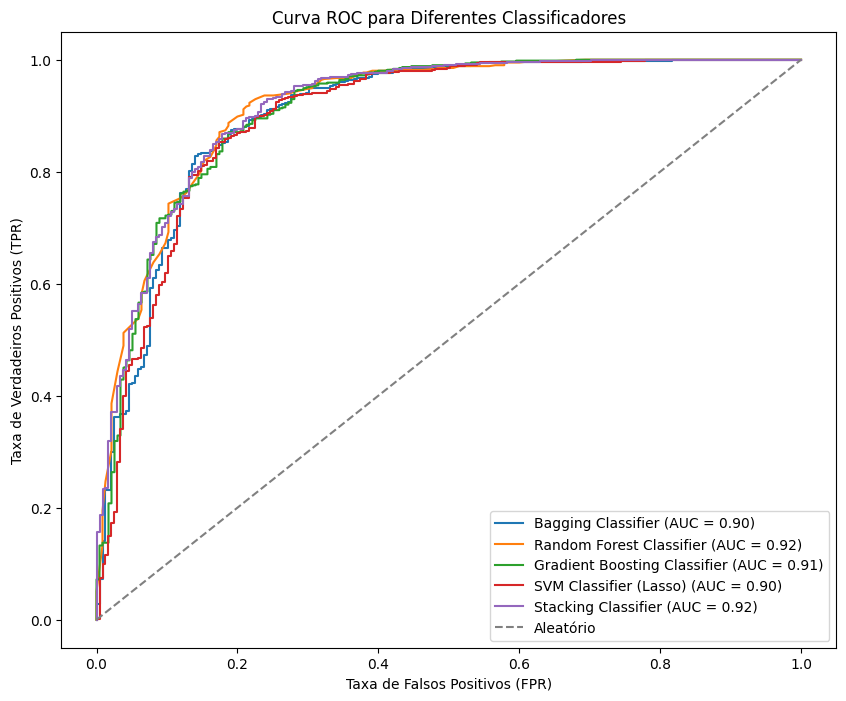

In [130]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for clf_name, clf in classifiers.items():
    # Obtenha as probabilidades previstas para a classe positiva (classe 1)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    # Calcule a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    # Calcule a área sob a curva ROC (AUC-ROC)
    auc = roc_auc_score(y_test, y_proba)
    
    # Plote a curva ROC
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {auc:.2f})')

# Adicione linha de referência para um classificador aleatório
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')

# Ajustes visuais
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para Diferentes Classificadores')
plt.legend()
plt.show()


In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Suponha que você tenha os modelos Random Forest e Stacking já treinados
random_forest_predictions = random_forest_classifier.predict(X_test)
stacking_predictions = stacking_classifier.predict(X_test)

# Função para calcular sensibilidade e especificidade
def calculate_sensitivity_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Métricas para o Random Forest
accuracy_rf = accuracy_score(y_test, random_forest_predictions)
precision_rf = precision_score(y_test, random_forest_predictions)
recall_rf = recall_score(y_test, random_forest_predictions)
f1_rf = f1_score(y_test, random_forest_predictions)
sensitivity_rf, specificity_rf = calculate_sensitivity_specificity(y_test, random_forest_predictions)

print("\nRandom Forest Metrics:")
print(f"Acurácia: {accuracy_rf:.2f}")
print(f"Precisão: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print(f"Sensibilidade: {sensitivity_rf:.2f}")
print(f"Especificidade: {specificity_rf:.2f}")

# Métricas para o Stacking Classifier
accuracy_stacking = accuracy_score(y_test, stacking_predictions)
precision_stacking = precision_score(y_test, stacking_predictions)
recall_stacking = recall_score(y_test, stacking_predictions)
f1_stacking = f1_score(y_test, stacking_predictions)
sensitivity_stacking, specificity_stacking = calculate_sensitivity_specificity(y_test, stacking_predictions)

print("\nStacking Classifier Metrics:")
print(f"Acurácia: {accuracy_stacking:.2f}")
print(f"Precisão: {precision_stacking:.2f}")
print(f"Recall: {recall_stacking:.2f}")
print(f"F1-score: {f1_stacking:.2f}")
print(f"Sensibilidade: {sensitivity_stacking:.2f}")
print(f"Especificidade: {specificity_stacking:.2f}")



Random Forest Metrics:
Acurácia: 0.88
Precisão: 0.91
Recall: 0.94
F1-score: 0.92
Sensibilidade: 0.94
Especificidade: 0.75

Stacking Classifier Metrics:
Acurácia: 0.88
Precisão: 0.91
Recall: 0.93
F1-score: 0.92
Sensibilidade: 0.93
Especificidade: 0.75


### Documentação da Avaliação do Modelo

#### Resultados Gerais:

1. *Desempenho dos Classificadores:*
   - Todos os classificadores (Bagging, Random Forest, Gradient Boosting, SVM com Lasso, e Stacking) apresentam desempenho geral satisfatório, com acurácias em torno de 0.88.

2. *Foco em Falsos Positivos:*
   - A análise coloca uma ênfase especial na importância de tratar falsos positivos, considerando que classificar erroneamente um estudante como permanente quando ele evadirá é mais problemático.

3. *Comparação entre Random Forest e Stacking Classifier:*
   - Ambos os modelos apresentam desempenho semelhante, com acurácias, precisões, recalls e F1-scores próximos. A escolha entre eles pode depender de considerações adicionais do projeto, como aa necessidade de uma menor sensibilidade e especificidade do modelo, de forma que seja mais robusto a pequenas variações nos dados.

#### Avaliação Detalhada de Modelos Individuais:

- *Bagging Classifier:*
  - Sensibilidade alta (0.95) indicando boa detecção de verdadeiros positivos, mas especificidade moderada (0.69).

- *Random Forest Classifier:*
  - Bom equilíbrio entre sensibilidade (0.94) e especificidade (0.75), destacando-se em ambas as métricas.

- *Gradient Boosting Classifier:*
  - Boa sensibilidade (0.92) e acurácia geralmente consistente com os demais.

- *SVM Classifier (Lasso):*
  - Sensibilidade alta (0.95) mas menor especificidade (0.66).

- *Stacking Classifier:*
  - Desempenho equilibrado, semelhante ao Random Forest.

#### Avaliação das Curvas ROC:

- *AUC para os Classificadores:*
  - Random Forest e Stacking apresentam AUC mais elevada (0.92), indicando boa capacidade discriminativa.

#### Considerações Finais:

Os resultados sugerem que tanto o Random Forest quanto o Stacking Classifier são candidatos sólidos, e a escolha entre eles pode depender das características específicas do projeto e das prioridades em relação aos falsos positivos.

Por fim, considerando os pequenos detalhes de variações das métricas, principalmente a melhor habilidade para evitar falsos positivos, a escolha mais adequado parece ser o algoritmo Random Forest, além do mais, este algoritmo além de mais robusto, é mais simples e evolve menos incertezas em relação ao seu treinamento. O algoritmo de Stacking apresenta uma metodologia de classificação mais indireta, além de depender de outros algoritmos. Dessa forma, pela simplicidade e robustez, o algoritmo Random Forest foi escolhido como mais adequado.

### Conclusão

Os resultados obtidos durante a fase de avaliação do modelo proporcionam insights valiosos alinhados aos objetivos de negócio do projeto. O modelo preditivo, desenvolvido com êxito, demonstrou uma capacidade considerável de identificar fatores determinantes para a evasão de estudantes e sucesso acadêmico. Ao atingir uma acurácia geral de aproximadamente 88%, o modelo oferece uma ferramenta eficaz para compreender e prever padrões no desempenho acadêmico dos alunos.

No contexto dos objetivos adicionais do cliente, o modelo também contribui para abordar questões específicas:

**Impacto das Condições Socioeconômicas na Evasão Estudantil**:

Ao considerar indicadores socioeconômicos, o modelo contribui para avaliar o impacto dessas condições na evasão estudantil, possibilitando estratégias de retenção mais direcionadas.

**Relação entre Desempenho Acadêmico Inicial e Sucesso Futuro**:

A capacidade do modelo em identificar padrões relacionados ao desempenho acadêmico inicial oferece informações cruciais para entender a trajetória dos alunos ao longo do tempo.

**Influência das Condições Econômicas Regionais nos Resultados Acadêmicos**:

A análise das condições econômicas regionais como parte do modelo proporciona uma compreensão abrangente de como esses fatores podem influenciar os resultados acadêmicos.
Esses resultados não apenas atendem ao objetivo principal de desenvolver um modelo preditivo eficaz para a evasão estudantil, mas também contribuem significativamente para uma compreensão holística dos fatores que impactam os resultados dos alunos. Com uma base sólida de insights, o projeto fornece uma fundação robusta para a implementação de estratégias proativas de retenção e suporte, além de orientar decisões estratégicas que beneficiarão a instituição de ensino.